# Analyzing Customer Conversions with Machine Learning and Decision Trees

Here we will expand your knowledge of explanatory analysis and show you how to use decision trees to understand the drivers of consumer behavior. We will start by comparing and explaining the differences between logistic regression and decision tree models, and then discuss how decision trees are built and trained. 

### Logistic Regression Vs Decision Trees
A logistic regression model learns from the data by finding the linear combination of feature variables that best estimates the logistic probability of an event occurring. Decision trees, as their name suggests, learn from data by growing a tree. 

We'll discuss how decision tree models grow and how to build trees in more detail below, but first... The main difference between logistic regression and decision tree models is the fact that logistic regression algorithms look for a single best linear boundary in the feature set, while the decision tree algorithm splits the data to find the subgroups of data that have a high probability of an event occurring. It'll be easier to explain this with an example. Let's take a look at the following diagram:

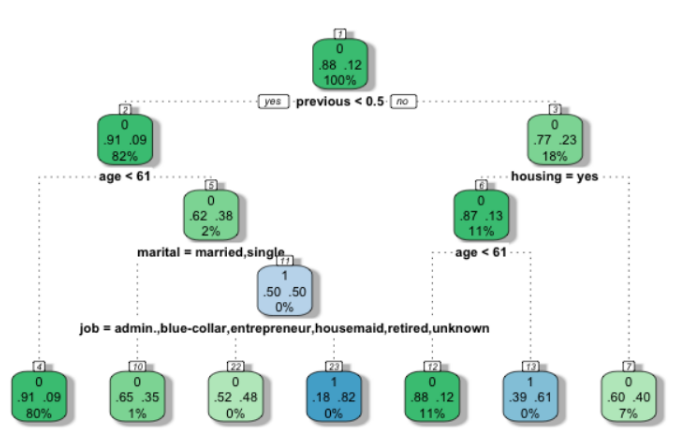

This is an example of a decision tree model. As you can see in this diagram, it divides the data with certain criteria. In this example, the root node is divided into child nodes by a criterion of `< 0.5` above. If this condition is met and true, then it moves to the left child node. If not, then it moves to the rightmost child node.

The left child node is then divided into its child nodes by an age criterion of `< 61`. The tree grows until it finds pure nodes (which means that all data points of each node belong to a class) or until it meets certain criteria for stopping, such as the maximum depth of the tree. As you can see in this example, the data is divided into seven partitions

The leftmost node or the lowest partition is for those data points with values below `0.5` for the previous variable and with values below `61` for the age variable. On the other hand, the rightmost node at the bottom is for those data points with values greater than `0.5` for the previous variable and with different values for the housing variable.

One thing you notice here is that there are many interactions between the different variables. No single-leaf node in this example tree is split with a condition. Each partition in this tree is formed with more than one criterion and with interactions between different features. This is the main difference with logistic regression models.

When there is no linear structure in the data, logistic regression models cannot work well, as they try to find linear combinations between features variables. On the other hand, decision tree models will perform better for non-linear datasets, since they only attempt to partition the data into the purest levels that they can.

### Growing Decision Trees

When decision trees grow, the trees need to have a logic to divide a node into child nodes. There are two main methods commonly used to divide data: Gini impurity and entropy information gain. Simply put, the Gini impurity measures how impure a partition is, and the entropy information gain measures how much information it gains by dividing the data with the criteria being tested.

Let's take a quick look at the equation to calculate the Gini impurity measurement:

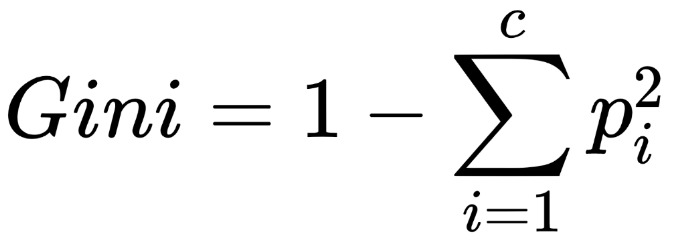

Here, the `c` represents the class labels, and the `Pi` represents the probability that the class label `i` will be chosen. By subtracting the sum of square probabilities from one, the Gini impurity measure reaches zero, that is, when all the records of each partition or node of a tree are pure with only one target class. 

The equation for calculating entropy looks like this

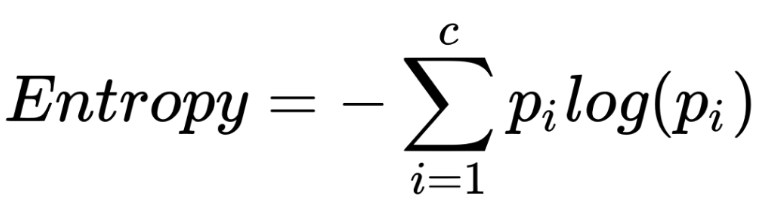

As before, the `c` represents the class labels, and the `Pi` represents the probability that the class label `i` will be chosen. As the tree grows, the entropy of each possible division should be calculated and compared with the entropy before the division. Then, the division that gives the greatest change in entropy measurements or the greatest gain of information will be chosen to grow the tree

This process will be repeated until all nodes are pure, or until the stop criteria are met

###  Decision Trees Interpretation

We will interpret the results by visualizations using the Python package `graphviz`. We will begin by taking an in-depth look at the bank marketing data set, using the pandas and matplotlib packages, and then discuss how to build and interpret decision tree models.

For this Notebook you'll find the dataset once <a href="https://www.narrativetext.co/pricing" target="_blank">you subscribe to our service here</a> 

So, let's begin

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('datasets/bank-full.csv', sep=";")

In [2]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.shape

(45211, 17)

## Data analysis and visualization
Before we start analyzing the data, we will first code the output variable, and, which has information about whether a customer has purchased or subscribed to a term deposit, with numerical values. You can use the following code to make an encoding of the output variable, and, with zeros and ones:

In [4]:
df['conversion'] = df['y'].apply(lambda x: 0 if x == 'no' else 1)

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,conversion
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


### Conversion rate

Let's first take a look at the aggregate conversion rate. The conversion rate is simply the percentage of customers who subscribed to a term deposit. Let's take a look at the following code:

In [6]:
conversion_rate_df = pd.DataFrame(
    df.groupby('conversion').count()['y'] / df.shape[0] * 100.0
)

In [7]:
conversion_rate_df

,y
conversion,
0,88.30152
1,11.69848


In [8]:
conversion_rate_df.T

conversion,0,1
y,88.30152,11.69848


For ease of viewing, you can transpose the DataFrame using the T attribute of the pandas DataFrame. As you can see, only about `11.7%` were converted or subscribed to a time deposit. From these results, we can see that there is a large imbalance between the conversion group and the non-conversion group, which is common and often seen between various marketing data sets.

**Conversion Rates by Jobs** It may be true that certain job categories tend to convert more often than others. Let's take a look at the conversion rates of different job categories. You can achieve this by using the following code:

In [9]:
conversion_rate_by_job = df.groupby(
    by='job'
)['conversion'].sum() / df.groupby(
    by='job'
)['conversion'].count() * 100.0

In [10]:
conversion_rate_by_job

job
admin.           12.202669
blue-collar       7.274969
entrepreneur      8.271688
housemaid         8.790323
management       13.755551
retired          22.791519
self-employed    11.842939
services          8.883004
student          28.678038
technician       11.056996
unemployed       15.502686
unknown          11.805556
Name: conversion, dtype: float64

Let's take a closer look at this code. First we group by the column, `job`, which contains information about the job category to which each client belongs. Then we add up the conversion column for each job category, from which we get the total number of conversions for each job category. Finally, we divide these conversion numbers by the total number of customers in each job category to get the conversion rates for each job category.

As you can see from these results, the `student` group tends to convert much more often than the other groups, and the `retired` group is next. However, it is a bit difficult to compare these results from the raw output, and we could present these data better using a graph. We can construct a horizontal bar chart using the following code:

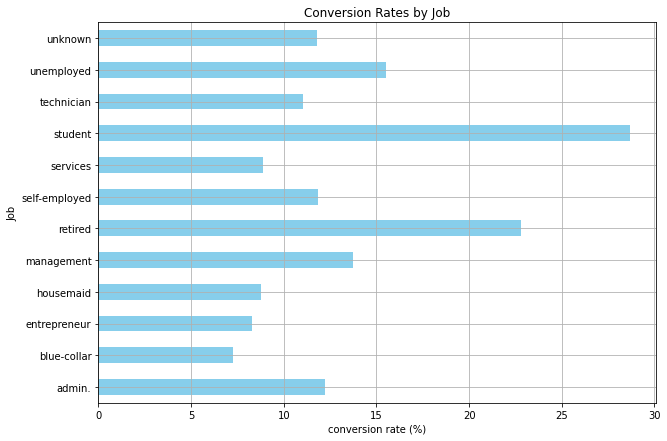

In [11]:
ax = conversion_rate_by_job.plot(
    kind='barh',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Job'
)

ax.set_xlabel('conversion rate (%)')
ax.set_ylabel('Job')

plt.show()

If you look at this code, we are using the `plot` function of the pandas DataFrame, and we define the type of this plot as a horizontal bar chart providing `barh` as input to the `kind` argument. You can simply adjust the color, size and title of the chart with the color, figure size and title arguments, respectively. You can also easily change the `x`- and `y`-axis labels, using the `set_xlabel` and `set_ylabel` functions.

As you can see, it is much easier to detect differences in conversion rates for each category of work with a horizontal bar chart. We can easily see that the student and retiree groups are the two groups with the highest conversion rates, while the worker and employer groups are the two groups with the lowest conversion rates.

**Conversion Delinquency Rates**

Another attribute of a customer that would be interesting to see is the default rate, and how it differs between those who made a time deposit and those who did not. We're going to use the `pivot_table` function in the pandas library to analyze delinquency rates through conversions. Let's take a look at the following code:

In [12]:
default_by_conversion_df = pd.pivot_table(
    df, 
    values='y', 
    index='default', 
    columns='conversion', 
    aggfunc=len
)

In [13]:
default_by_conversion_df

conversion,0,1
default,,
no,39159,5237
yes,763,52


As you can see in this code, we are rotating the DataFrame, `df`, by the columns `y` and by `default`. Using `len` as the aggregation function, we can count how many clients fall under each cell of the pivot table.

It is a bit difficult to compare how default rates differ between conversion groups and non-conversion groups by looking at these raw numbers. One way to visualize this data is through a pie chart. You can use the following code to construct a pie chart

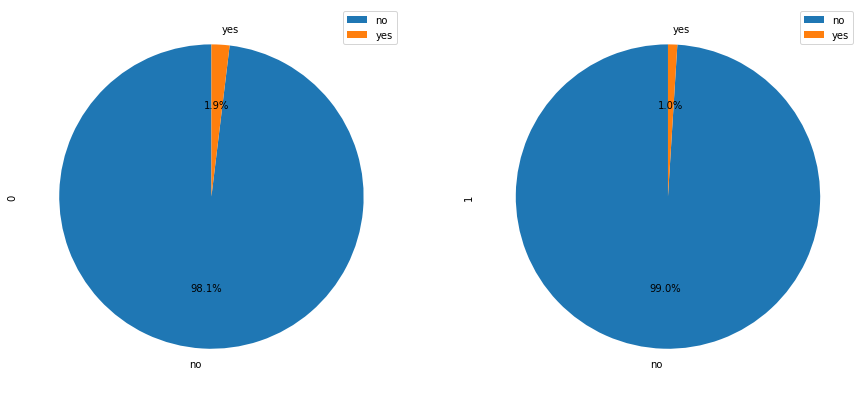

In [14]:
default_by_conversion_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

As can be seen in these pie charts, it is much easier to compare delinquency rates between conversion and non-conversion groups. Although the overall percentage of the above default is low in both groups, the default rate in the non-conversion group is about twice as high as in the conversion group.

**Bank Balances by Conversion**

Next, we will try to see if there are differences in the distribution of bank balances between the conversion and non-conversion groups. A box chart is typically a good way to visualize the distribution of a variable. Let's take a look at the following code:

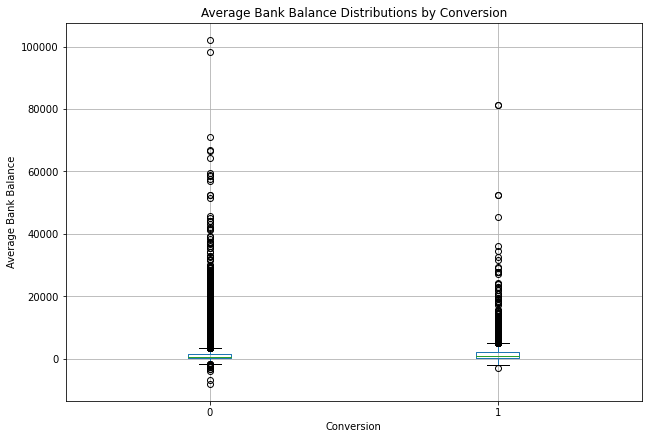

In [15]:
ax = df[['conversion', 'balance']].boxplot(
    by='conversion',
    showfliers=True,
    figsize=(10, 7)
)

ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')

plt.suptitle("")
plt.show()

Due to the large number of outliers, it is quite difficult to identify any differences between the two distributions. Let's build another box plot without outliers. The only thing you need to change from the previous code is the argument `showfliers=True` in the `boxplot` function, as you can see in the following code:

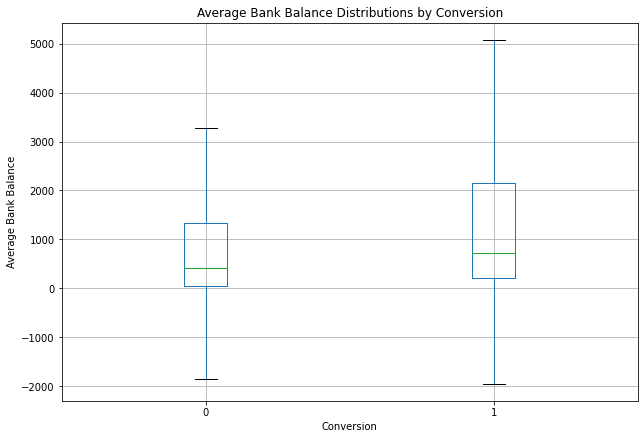

In [16]:
ax = df[['conversion', 'balance']].boxplot(
    by='conversion',
    showfliers=False,
    figsize=(10, 7)
)

ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')

plt.suptitle("")
plt.show()

In these box charts, we can see that the median bank balance is slightly higher for the conversion group, compared to the non-conversion group. In addition, the bank balances of converted customers seem to vary more than those of non-converted customers.

**Conversion Rates by Number of Contacts**

Finally, we will see how conversion rates vary according to the number of contacts. Typically, in marketing, a greater number of marketing contacts can result in marketing fatigue, where conversion rates fall as customers are reached more often. Let's see if there is any marketing fatigue in our data. Take a look at the following code:

In [17]:
conversions_by_num_contacts = df.groupby(
    by='campaign'
)['conversion'].sum() / df.groupby(
    by='campaign'
)['conversion'].count() * 100.0

In [18]:
conversions_by_num_contacts

campaign
1     14.597583
2     11.203519
3     11.193624
4      9.000568
5      7.879819
6      7.126259
7      6.394558
8      5.925926
9      6.422018
10     5.263158
11     7.960199
12     2.580645
13     4.511278
14     4.301075
15     4.761905
16     2.531646
17     8.695652
18     0.000000
19     0.000000
20     2.325581
21     2.857143
22     0.000000
23     0.000000
24     5.000000
25     0.000000
26     0.000000
27     0.000000
28     0.000000
29     6.250000
30     0.000000
31     0.000000
32    11.111111
33     0.000000
34     0.000000
35     0.000000
36     0.000000
37     0.000000
38     0.000000
39     0.000000
41     0.000000
43     0.000000
44     0.000000
46     0.000000
50     0.000000
51     0.000000
55     0.000000
58     0.000000
63     0.000000
Name: conversion, dtype: float64

In this code snippet, you can see that we are grouping by the campaign column (which has information about the number of contacts made during the marketing campaign for this client) and calculating the conversion rates for each number of contacts.

As before, it would be easier to look at a graph, rather than raw numbers. We can graph this data using bar charts, with the following code:

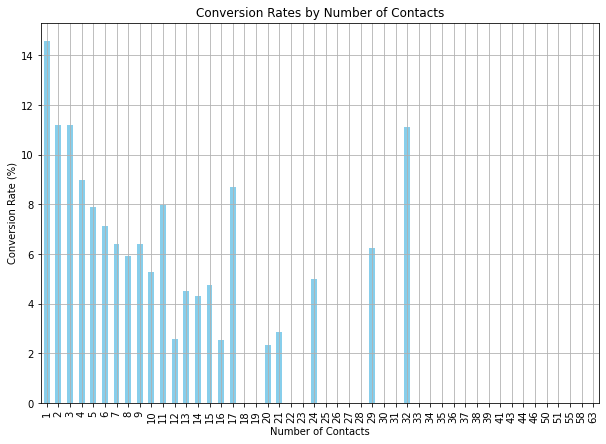

In [19]:
ax = conversions_by_num_contacts.plot(
    kind='bar',
    figsize=(10, 7),
    title='Conversion Rates by Number of Contacts',
    grid=True,
    color='skyblue'
)

ax.set_xlabel('Number of Contacts')
ax.set_ylabel('Conversion Rate (%)')

plt.show()

There is some noise in a larger number of contacts, as the sample size is smaller for them, but you can easily see the general downward trend in this bar chart. As the number of contacts increases, the conversion rates slowly decrease. This suggests that the expected conversion rate decreases as a client is contacted more frequently for a given campaign.

### Encoding of categorical variables

There are eight categorical variables in this data set: `job, marital, education, default, housing, loan, contact, and month`. Before we start building decision trees, we need to code these categorical variables with numerical values. We will see how we can code some of these categorical variables in this section.

**Coding of months**

We all know that there can only be 12 unique values for the month variable. Let's take a quick look at what we have in our data set. Take a look at the following code:

In [20]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

As expected, we have 12 unique values for the month's column, from January to December. As there is a natural order in the values of the month, we can code each of the values with a corresponding number. One way to code the month's string values with numbers is shown below:

In [21]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

df['month'] = df['month'].apply(
    lambda x: months.index(x)+1
)

In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,conversion
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,no,0


In [23]:
df['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9])

To see how many records we have for each month, we can use the following code:

In [24]:
df.groupby('month').count()['conversion']

month
1      1403
2      2649
3       477
4      2932
5     13766
6      5341
7      6895
8      6247
9       579
10      738
11     3970
12      214
Name: conversion, dtype: int64

### Job encoding
Next, let's see how we can code the different categories in the working column. First we will see the unique values of this column, using the following code:

In [25]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

As you can see in this output, there is no natural order for this variable. One category of work does not precede the other, so we cannot code this variable as we did for the month.

We are going to create dummy variables for each of the work categories. A dummy variable is a variable that is coded with `1` if a certain record belongs to the category, and with `0` if not. We can easily do this using the following code:

In [26]:
jobs_encoded_df = pd.get_dummies(df['job'])

In [27]:
jobs_encoded_df

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,1,0,0
45207,0,0,0,0,0,1,0,0,0,0,0,0
45208,0,0,0,0,0,1,0,0,0,0,0,0
45209,0,1,0,0,0,0,0,0,0,0,0,0


In [28]:
jobs_encoded_df.columns = ['job_%s' % x for x in jobs_encoded_df.columns]

In [29]:
jobs_encoded_df

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,1,0,0
45207,0,0,0,0,0,1,0,0,0,0,0,0
45208,0,0,0,0,0,1,0,0,0,0,0,0
45209,0,1,0,0,0,0,0,0,0,0,0,0


As you can see in this code fragment, the function `get_dummies` of the pandas package creates a dummy variable for each category of the `job` variable, and codes each record with `1` if the given record belongs to the corresponding category, and `0` if not. Then, we rename the columns by prefixing each column with the `job_` prefix.

As you can see, the first record (or client) belongs to the job category of admin, while the second record belongs to the job category of blue-collar. Now that we have created dummy variables for each job category, we need to add this data to the existing DataFrame. Take a look at the following code:

In [30]:
df = pd.concat([df, jobs_encoded_df], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,0,0,0,0,0,0,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,1


Using the `concat` function in the pandas package, you can easily add the newly created DataFrame with dummy variables, `jobs_encoded_df`, to the original DataFrame, `df`. The argument `axis=1` tells the `concat` function **to concatenate the second DataFrame with the first one as columns, not as rows**.

As you can see, the newly created dummy variables are added to the original DataFrame as new columns for each record.

### `Marital` encoding
Similar to how we code the categorical variable, `job`, we will create dummy variables for each category of the marital variable. As before, we are using the following code to code the marital column:

In [31]:
marital_encoded_df = pd.get_dummies(df['marital'])

In [32]:
marital_encoded_df

,divorced,married,single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1
...,...,...,...
45206,0,1,0
45207,1,0,0
45208,0,1,0
45209,0,1,0


In [33]:
marital_encoded_df.columns = ['marital_%s' % x for x in marital_encoded_df.columns]

In [34]:
marital_encoded_df

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1
...,...,...,...
45206,0,1,0
45207,1,0,0
45208,0,1,0
45209,0,1,0


In [35]:
df = pd.concat([df, marital_encoded_df], axis=1)

In [36]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,1,0,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,0,0,0,0,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,1,0,0,1


Once you've gotten this far, your original DataFrame, `df`, should contain all the original columns, plus the newly created dummy variables for the work and marital columns.

### Coding the Housing and Loan Variables

The last two categorical variables that we will code in this section are the home and the loan. The housing variable has two unique values, "yes" and "no", and contains information about whether a client has a home loan. The other variable, loan, also has two unique values, "yes" and "no," and tells us if a client has a personal loan. We can easily code these two variables using the following code:

In [37]:
df['housing'] = df['housing'].apply(lambda x: 1 if x == 'yes' else 0)

In [38]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,management,married,tertiary,no,2143,1,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
1,44,technician,single,secondary,no,29,1,no,unknown,5,...,0,0,0,0,1,0,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,1,yes,unknown,5,...,0,0,0,0,0,0,0,0,1,0
3,47,blue-collar,married,unknown,no,1506,1,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
4,33,unknown,single,unknown,no,1,0,no,unknown,5,...,0,0,0,0,0,0,1,0,0,1


In [39]:
df['loan'] = df['loan'].apply(lambda x: 1 if x == 'yes' else 0)

In [40]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,management,married,tertiary,no,2143,1,0,unknown,5,...,0,0,0,0,0,0,0,0,1,0
1,44,technician,single,secondary,no,29,1,0,unknown,5,...,0,0,0,0,1,0,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,1,1,unknown,5,...,0,0,0,0,0,0,0,0,1,0
3,47,blue-collar,married,unknown,no,1506,1,0,unknown,5,...,0,0,0,0,0,0,0,0,1,0
4,33,unknown,single,unknown,no,1,0,0,unknown,5,...,0,0,0,0,0,0,1,0,0,1


## Building Decision Trees
Now that we have coded all the categorical variables, we can finally start building decision tree models. We will use the following variables as characteristics in our decision tree models:

In [41]:
features = [
    'age',
    'balance',
    'campaign',
    'previous',
    'housing',
    'job_admin.',
    'job_blue-collar',
    'job_entrepreneur',
    'job_housemaid',
    'job_management',
    'job_retired',
    'job_self-employed',
    'job_services',
    'job_student',
    'job_technician',
    'job_unemployed',
    'job_unknown',
    'marital_divorced',
    'marital_married',
    'marital_single'
]

To build and train a decision tree model with Python, we will use the `tree` module in the scikit-learn package. You can import the required module using the following line of code:

In [42]:
from sklearn import tree

Under the tree module in the sklearn package, there is a class called `DecisionTreeClassifier`, which we can use to train a decision tree model. Take a look at the following code:

In [43]:
dt_model = tree.DecisionTreeClassifier(
    max_depth=4
)

There are many arguments for the `DecisionTreeClassifier` class, apart from the one we are using here, `max_depth`. The argument `max_depth` controls how much a tree can grow, and here, we limit it to `4`, which means that the maximum length from root to leaf can be `4`.

You can also use the `criterion` argument to choose between the Gini impurity and entropy information gain measures for the quality of a split.

There are many other ways to adjust your decision tree model, and we recommend that you take a look at the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html" target="_blank">documentation at for more information</a>.

To train this decision tree model, you can use the following code:

In [44]:
dt_model.fit(df[features], df['conversion'])

DecisionTreeClassifier(max_depth=4)

### Interpretation of decision trees
Now that we have trained a decision tree model, we need to extract the knowledge from the model. In this section, we're going to use a package called `graphviz`. You can install this package using the following command in your terminal:

In [45]:
!pip3 install python-graphviz

ERROR: Could not find a version that satisfies the requirement python-graphviz (from versions: none)
ERROR: No matching distribution found for python-graphviz
You should consider upgrading via the '/home/daniel/Desktop/narrativetext_project/notebooks/bin/python -m pip install --upgrade pip' command.


In [46]:
import graphviz

Now that we have configured our environment with the new package, graphviz, let's take a look at the following code to see how we can visualize the trained decision tree:

In [47]:
dot_data = tree.export_graphviz(
    dt_model, 
    feature_names=features, 
    class_names=['0', '1'], 
    filled=True, 
    rounded=True, 
    special_characters=True
) 

graph = graphviz.Source(dot_data)

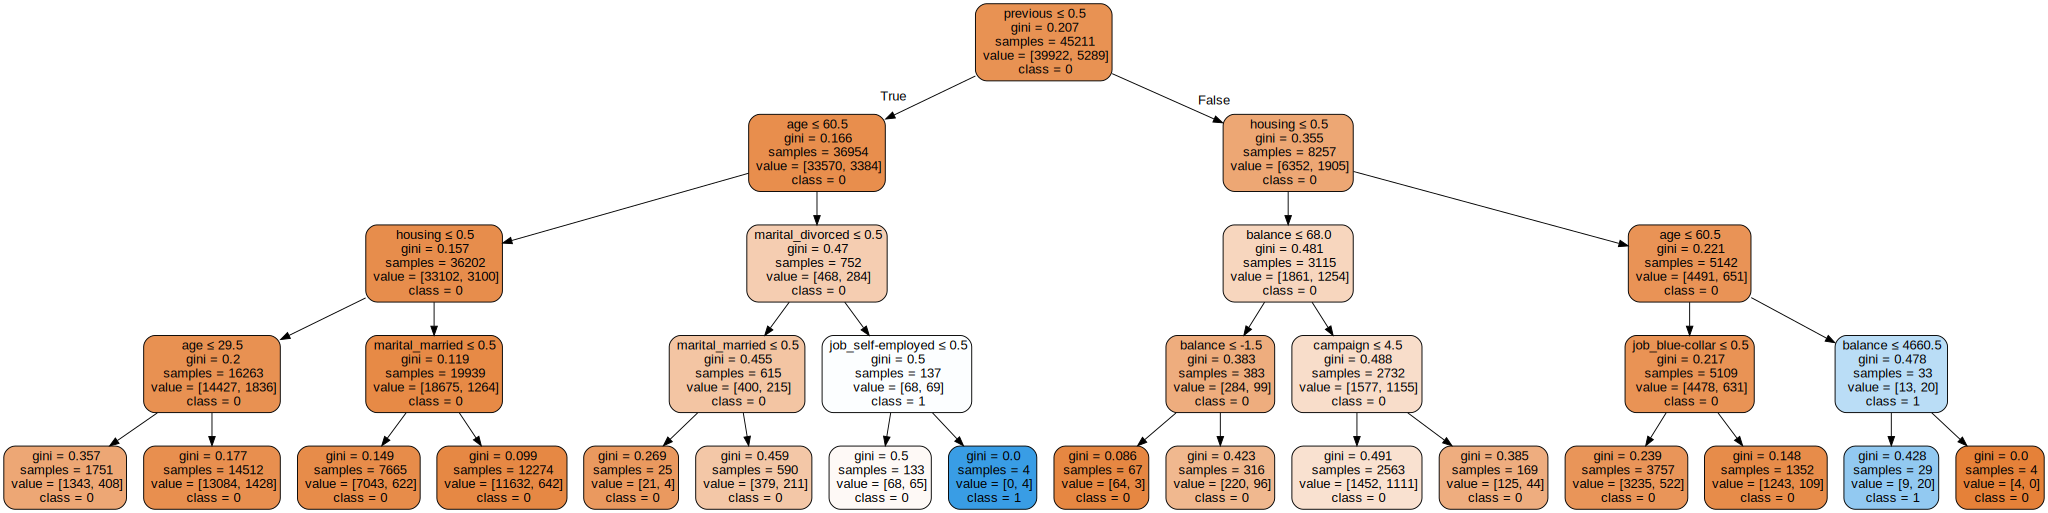

In [48]:
graph

As you can see, we first export the trained decision tree model, `dt_model`, using the `export_graphviz` function in the tree module of the sklearn package.

We can define the feature variables that we use to train this model using the `feature_names` argument. Then, we can define the classes (conversion versus non-conversion) that this model is trained to classify.

The `export_graphviz` function exports the trained decision tree model in a DOT format, which is a graphical description language. Then, you can pass `dot_data` to graphviz's `Source` class. The `graphviz` variable now contains a renderable graph.

Let's take a closer look at this diagram. Each node contains five lines that describe the information the given node has. The top line tells us the division criterion. The root node, for example, is divided into its child nodes based on the value of the variable above. If the value of this previous variable is less than or equal to `0.5`, then it goes to the left child. On the other hand, if the value of this previous variable is greater than `0.5`, then it goes to the right child.

The second line tells us the value of the quality measure for the division. Here, we select the gini impurity measure for the criterion, so we can see the changes in the impurity measures at each node on the second line. The third line tells us the total number of records that belong to the given node. For example, there are `45,211 `samples at the root node, and there are `8,257` samples at the right son of the root node.

The fourth line for each node tells us the composition of the records in two different classes. The first element represents the number of records in the non-conversion group, and the second element represents the number of records in the conversion group. For example, in the root node, there are `39,922` records in the non-conversion group and `5,289` records in the conversion group. Finally, the fifth line of each node tells us what will be the prediction or classification of the node in question. For example, if a sample belongs to the leftmost leaf, the classification of this decision tree model will be `0`, which means that there will be no conversion. On the other hand, if a sample belongs to the eighth leaf from the left, the classification of this decision tree model will be 1, which means conversion.

Now that we know what each line of each node means, let's discuss how we can get information from this tree graph. To understand the clients that belong to each leaf node, we have to go through the tree. For example, the clients that belong to the eighth leaf node on the left are those who have a value of `0` for the previous variable, an age greater than `60.5`, a marital_divorced variable with a value of `1`, and a self-employed_working variable with a value of `1`. In other words, those who were not contacted before this campaign and who are greater than `60.5`, divorced and self-employed belong to this node, and have a high probability of conversion.

Let's look at another example. The clients who belong to the second node on the right-hand sheet are those who have a value of 1 for the previous variable, a value of `1` for the housing variable, an age greater than `60.5`, and a balance less than or equal to `4,660.5`. That is, those clients who were contacted before this campaign and who have a housing loan, are over `60.5`, and have a bank balance of less than `4,660.5` belong to this node and `20` of the 29 belonging to this node have been converted and subscribed to a time deposit.

**As you will have noticed in these two examples, useful knowledge about who is more or less likely to convert can be obtained from trained decision tree models, by visualizing the trained tree. Just follow the nodes and understand what types of attributes are highly correlated with your target class**. For this exercise, we restrict the tree to grow only to a depth of 4, but you can choose to grow a larger or smaller tree than the one we use in this exercise.